<a href="https://colab.research.google.com/github/FaiazS/TensorBoard/blob/main/TensorBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Load Libraries

import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Load Data
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
#Building Model

model = models.Sequential([layers.Flatten(input_shape = (28,28)),

                           layers.Dense(128, activation = 'relu'),

                           layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
#Defining a TensorBoard Callback

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = './logs/adam')

In [11]:
#Compling the model

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
#Training the model with TensorBoard Callback

model.fit(x_train, y_train, epochs = 5, callbacks = [tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8229 - loss: 7.5677
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9024 - loss: 0.4240
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9269 - loss: 0.2922
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9348 - loss: 0.2588
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9408 - loss: 0.2275


In [13]:
#Evaluate Model

test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9310 - loss: 0.3021


In [15]:
#Making predictions with the trained model.

predicted_output = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


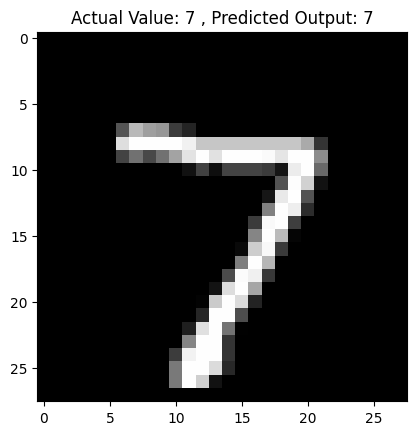

In [18]:
#Plotting the result.

plt.imshow(x_test[0], cmap = 'gray')

plt.title(f"Actual Value: {y_test[0]} , Predicted Output: {np.argmax(predicted_output[0])}")

plt.show()